# Machine Learning Modeling Employee Resignation 

### a.  Problem Statement

Pada tahun 2015, PT.XYZ mengalami kehilangan pegawainya sebanyak 162 orang/ 3.27%  dari total pegawainya. oleh karena itu PT.XYZ meminta tolong kepada tim Data Science Purwadhika untuk melakukan pengecekan terhadap data karyawannya untuk mencari tahu parameter apasaja yang menyebabkan karyawannya keluar. hal ini dilakukan karena dengan hilangnya karyawan akan sangat berpengaruh terhadap pekerjaan dan berimpact besar terhadap kepada perusahaan. 

### b.  Project Goals
- Melakukan identifikasi terhadap data karyawan untuk mengetahui parameter apa saja yang menyebabkan karyawannya keluar
- Membuat Machine learning untuk menprediksi apakah karyawannya keluar

## 1. Import Package

In [1]:
import  numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sidetable as stb
from IPython.display import Image


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

####  Data Dictionary

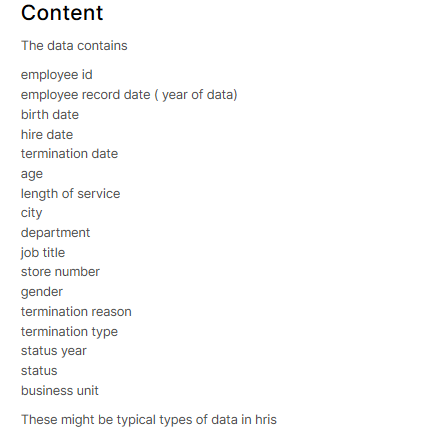

In [3]:
Image("Employee.png")

## 2. Read Data

In [2]:
df = pd.read_csv('employee.csv')
df

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49648,8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES
49651,8296,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19,0,Kelowna,Customer Service,Cashier,16,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES


## 3. Describe Data

In [4]:
#untuk mengecek informasi dari jumlah kolom, baris dan nama kolom
print("Jumlah Kolom: ",df.shape[1]) #indexing 1
print("Jumlah Baris: ",df.shape[0]) #indexing 0
print("Daftar kolom: ",df.columns)

Jumlah Kolom:  18
Jumlah Baris:  49653
Daftar kolom:  Index(['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key', 'age', 'length_of_service', 'city_name',
       'department_name', 'job_title', 'store_name', 'gender_short',
       'gender_full', 'termreason_desc', 'termtype_desc', 'STATUS_YEAR',
       'STATUS', 'BUSINESS_UNIT'],
      dtype='object')


In [5]:
#untuk mendeskripsikan dataframe employee yang terdiri dari column, ,typedata,jumlah nan, persentase nan,jumlah variasi data, dan value dari unique data
data_describe = []

for i in df.columns:
    data_describe.append([
        i,
        df[i].dtypes,
        df[i].isnull().sum(),
        round((((df[i].isnull().sum()) / (len(df))) * 100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().values
    ])

In [6]:
# membuat dataframe dengan data data_describe dengan kolom-kolom tersebut
deskripsi = pd.DataFrame(data_describe, columns=['column','type','nan','nan%','nunique','unique'])
deskripsi

,column,type,nan,nan%,nunique,unique
0,EmployeeID,int64,0,0.0,6284,"[1318, 1319, 1320, 1321, 1322, 1323, 1325, 132..."
1,recorddate_key,object,0,0.0,130,"[12/31/2006 0:00, 12/31/2007 0:00, 12/31/2008 ..."
2,birthdate_key,object,0,0.0,5342,"[1/3/1954, 1/3/1957, 1/2/1955, 1/2/1959, 1/9/1..."
3,orighiredate_key,object,0,0.0,4415,"[8/28/1989, 8/31/1989, 9/2/1989, 9/5/1989, 9/8..."
4,terminationdate_key,object,0,0.0,1055,"[1/1/1900, 2/16/2009, 2/19/2014, 2/19/2009, 2/..."
5,age,int64,0,0.0,47,"[52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 49, 5..."
6,length_of_service,int64,0,0.0,27,"[17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 16, 1..."
7,city_name,object,0,0.0,40,"[Vancouver, Terrace, Nanaimo, Nelson, Kelowna,..."
8,department_name,object,0,0.0,21,"[Executive, Store Management, Meats, Recruitme..."
9,job_title,object,0,0.0,47,"[CEO, VP Stores, Legal Counsel, VP Human Resou..."


## 4.Handling Missing Value

In [7]:
df.isna().sum()

EmployeeID             0
recorddate_key         0
birthdate_key          0
orighiredate_key       0
terminationdate_key    0
age                    0
length_of_service      0
city_name              0
department_name        0
job_title              0
store_name             0
gender_short           0
gender_full            0
termreason_desc        0
termtype_desc          0
STATUS_YEAR            0
STATUS                 0
BUSINESS_UNIT          0
dtype: int64

berdasarkan pengecekan secara cepat, tidak ditemukan data yang Nan, sehingga akan dilakukan pengecekan lebih mendalam

In [8]:
df.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


dari data diatas, ditemukan duplikasi mengenai ID karyawan sehingga akan dilakukan pengecekan secara mendalam

In [9]:
df[df['EmployeeID']==1318]

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
5,1318,12/31/2011 0:00,1/3/1954,8/28/1989,1/1/1900,57,22,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2011,ACTIVE,HEADOFFICE
6,1318,12/31/2012 0:00,1/3/1954,8/28/1989,1/1/1900,58,23,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2012,ACTIVE,HEADOFFICE
7,1318,12/31/2013 0:00,1/3/1954,8/28/1989,1/1/1900,59,24,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,HEADOFFICE
8,1318,12/31/2014 0:00,1/3/1954,8/28/1989,1/1/1900,60,25,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2014,ACTIVE,HEADOFFICE
9,1318,12/31/2015 0:00,1/3/1954,8/28/1989,1/1/1900,61,26,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE


Setelah dilakukan pengecekan terhadap EmployeeID dengan ID 1318 sebagai sample, ditemukan bahwa terjadi duplikasi terhadap data tersebut, sehingga diputuskan untuk melakukan droping pada data duplikat.

In [10]:
df = df.drop_duplicates(subset='EmployeeID', keep="last")
df

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
9,1318,12/31/2015 0:00,1/3/1954,8/28/1989,1/1/1900,61,26,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
19,1319,12/31/2015 0:00,1/3/1957,8/28/1989,1/1/1900,58,26,Vancouver,Executive,VP Stores,35,F,Female,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
29,1320,12/31/2015 0:00,1/2/1955,8/28/1989,1/1/1900,60,26,Vancouver,Executive,Legal Counsel,35,F,Female,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
39,1321,12/31/2015 0:00,1/2/1959,8/28/1989,1/1/1900,56,26,Vancouver,Executive,VP Human Resources,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
49,1322,12/31/2015 0:00,1/9/1958,8/31/1989,1/1/1900,57,26,Vancouver,Executive,VP Finance,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49648,8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES
49651,8296,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19,0,Kelowna,Customer Service,Cashier,16,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES


In [11]:
#untuk mengecek informasi dari jumlah kolom, baris dan nama kolom setelah melakukan cleaning
print("Jumlah Kolom: ",df.shape[1]) #indexing 1
print("Jumlah Baris: ",df.shape[0]) #indexing 0
print("Daftar kolom: ",df.columns)

Jumlah Kolom:  18
Jumlah Baris:  6284
Daftar kolom:  Index(['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
       'terminationdate_key', 'age', 'length_of_service', 'city_name',
       'department_name', 'job_title', 'store_name', 'gender_short',
       'gender_full', 'termreason_desc', 'termtype_desc', 'STATUS_YEAR',
       'STATUS', 'BUSINESS_UNIT'],
      dtype='object')


setelah dilakukan pembersihan dengan menghilangkan duplikasi pada EmployeeID, dapat dilihat bahwa data Karyawan tinggal 6284

In [12]:
''' mengubah kolom terminationdate_key menjadi datetime dan mengeskpor kolom tersebut menjadi kolom hari (angka), bulan (angka), bulan (nama), 
serta tahun untuk mengetahui bulan apa saja dan tanggal berapa karyawan dihire'''
df['date'] = pd.to_datetime(df['terminationdate_key'])
df["dayTerm"] = df["date"].apply(lambda x : x.day)
df["monthIntTerm"] = df["date"].apply(lambda x : x.month)
df["monthTerm"] = df["date"].apply(lambda x : x.month_name())
df["yearTerm"] = df["date"].apply(lambda x : x.year)

In [13]:
df.drop(columns=['terminationdate_key'], axis=1, inplace = True)

In [14]:
df.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,age,length_of_service,city_name,department_name,job_title,store_name,...,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT,date,dayTerm,monthIntTerm,monthTerm,yearTerm
9,1318,12/31/2015 0:00,1/3/1954,8/28/1989,61,26,Vancouver,Executive,CEO,35,...,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE,1900-01-01,1,1,January,1900
19,1319,12/31/2015 0:00,1/3/1957,8/28/1989,58,26,Vancouver,Executive,VP Stores,35,...,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE,1900-01-01,1,1,January,1900
29,1320,12/31/2015 0:00,1/2/1955,8/28/1989,60,26,Vancouver,Executive,Legal Counsel,35,...,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE,1900-01-01,1,1,January,1900
39,1321,12/31/2015 0:00,1/2/1959,8/28/1989,56,26,Vancouver,Executive,VP Human Resources,35,...,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE,1900-01-01,1,1,January,1900
49,1322,12/31/2015 0:00,1/9/1958,8/31/1989,57,26,Vancouver,Executive,VP Finance,35,...,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE,1900-01-01,1,1,January,1900


In [15]:
df.drop(columns=['date'], axis=1, inplace = True)

In [16]:
''' mengubah kolom orighiredate_key menjadi datetime dan mengeskpor kolom tersebut menjadi kolom hari (angka), bulan (angka), bulan (nama), 
serta tahun untuk mengetahui bulan apa saja dan tanggal berapa karyawan dihire'''
df['dateHire'] = pd.to_datetime(df['orighiredate_key'])
df["dayHire"] = df["dateHire"].apply(lambda x : x.day)
df["monthIntHire"] = df["dateHire"].apply(lambda x : x.month)
df["monthHire"] = df["dateHire"].apply(lambda x : x.month_name())
df["yearHire"] = df["dateHire"].apply(lambda x : x.year)

In [17]:
df.drop(columns=['orighiredate_key','dateHire'], axis=1, inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6284 entries, 9 to 49652
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   EmployeeID         6284 non-null   int64 
 1   recorddate_key     6284 non-null   object
 2   birthdate_key      6284 non-null   object
 3   age                6284 non-null   int64 
 4   length_of_service  6284 non-null   int64 
 5   city_name          6284 non-null   object
 6   department_name    6284 non-null   object
 7   job_title          6284 non-null   object
 8   store_name         6284 non-null   int64 
 9   gender_short       6284 non-null   object
 10  gender_full        6284 non-null   object
 11  termreason_desc    6284 non-null   object
 12  termtype_desc      6284 non-null   object
 13  STATUS_YEAR        6284 non-null   int64 
 14  STATUS             6284 non-null   object
 15  BUSINESS_UNIT      6284 non-null   object
 16  dayTerm            6284 non-null   int64 

In [19]:
df.describe()

,EmployeeID,age,length_of_service,store_name,STATUS_YEAR,dayTerm,monthIntTerm,yearTerm,dayHire,monthIntHire,yearHire
count,6284.000000,6284.000000,6284.000000,6284.000000,6284.000000,6284.000000,6284.000000,6284.000000,6284.000000,6284.000000,6284.000000
mean,5088.843094,44.742998,12.836410,27.098345,2013.979949,5.016073,2.529917,1926.156111,15.873329,6.624920,2001.049491
std,1956.079548,14.134458,6.747744,13.402742,2.343612,8.578493,3.294678,47.046670,8.842344,3.455797,6.873515
min,1318.000000,19.000000,0.000000,1.000000,2006.000000,1.000000,1.000000,1900.000000,1.000000,1.000000,1989.000000
25%,3482.750000,32.000000,7.000000,16.000000,2015.000000,1.000000,1.000000,1900.000000,8.000000,4.000000,1995.000000
50%,5180.500000,45.000000,13.000000,28.000000,2015.000000,1.000000,1.000000,1900.000000,16.000000,7.000000,2000.000000
75%,6765.250000,58.000000,19.000000,41.000000,2015.000000,1.000000,1.000000,1900.000000,24.000000,10.000000,2007.000000
max,8336.000000,65.000000,26.000000,46.000000,2015.000000,31.000000,12.000000,2015.000000,31.000000,12.000000,2013.000000


In [20]:
df.describe(include='O')

,recorddate_key,birthdate_key,city_name,department_name,job_title,gender_short,gender_full,termreason_desc,termtype_desc,STATUS,BUSINESS_UNIT,monthTerm,monthHire
count,6284,6284,6284,6284,6284,6284,6284,6284,6284,6284,6284,6284,6284
unique,121,5342,40,21,47,2,2,4,3,2,2,12,12
top,12/31/2015 0:00,3/19/1989,Vancouver,Meats,Meat Cutter,F,Female,Not Applicable,Not Applicable,ACTIVE,STORES,January,November
freq,4799,4,1392,1252,1218,3278,3278,4799,4799,4799,6204,4887,590


## 5.Handling Outiers / Imbalance data (5 point)

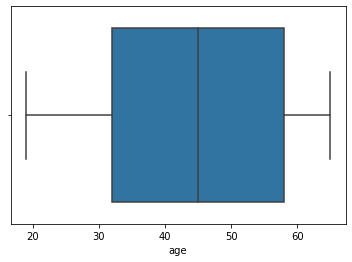

In [21]:
sns.boxplot(df['age'])
plt.show()

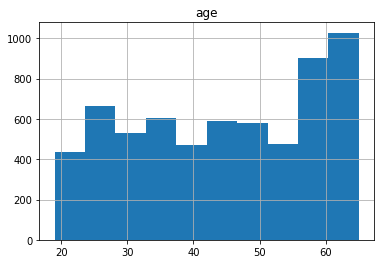

count    6284.000000
mean       44.742998
std        14.134458
min        19.000000
25%        32.000000
50%        45.000000
75%        58.000000
max        65.000000
Name: age, dtype: float64


In [22]:
df.hist(column='age')
plt.show()
print(df['age'].describe())

In [23]:
df['age'].mode()

0    65
dtype: int64

- Tidak ditemukan Outlier dari data umur karyawan
- Dapat dilihat Karyawan paling muda berusia 19 tahun dan paling tua berusia 65 tahun.
- Median dari persebaran total karyawan adalah 45 Tahun
- Rata-rata umur karyawan adalah 44 tahun. 
- Mayoritas karyawan berumur 65 Tahun

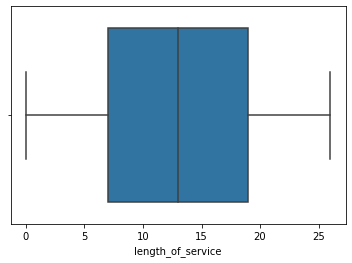

In [24]:
sns.boxplot(df['length_of_service'])
plt.show()

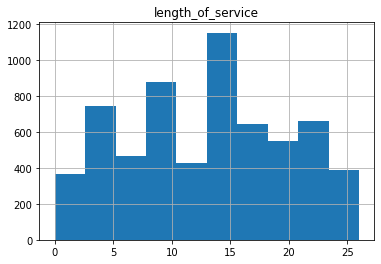

count    6284.000000
mean       12.836410
std         6.747744
min         0.000000
25%         7.000000
50%        13.000000
75%        19.000000
max        26.000000
Name: length_of_service, dtype: float64


In [25]:
df.hist(column='length_of_service')
plt.show()
print(df['length_of_service'].describe())

In [26]:
df['length_of_service'].mode()

0    13
dtype: int64

- Tidak ditemukan outlier pada kolom lamanya bekerja karyawan
- Dapat dilihat terdapat karyawan yang belum setahun bekerja di PT.XYZ dan terdapat juga karyawan yang memiliki pengalaman kerja di PT.XYZ selama 26 tahun
- Median dari persebaran data ada 13 Tahun
- Rata-rata lama karyawan bekerja adalah 12 tahun. 
- Mayoritas karyawan di PT.XYZ telah bekerja selama 13 Tahun

## 6.Data Analysis & Visualization

In [27]:
df.columns

Index(['EmployeeID', 'recorddate_key', 'birthdate_key', 'age',
       'length_of_service', 'city_name', 'department_name', 'job_title',
       'store_name', 'gender_short', 'gender_full', 'termreason_desc',
       'termtype_desc', 'STATUS_YEAR', 'STATUS', 'BUSINESS_UNIT', 'dayTerm',
       'monthIntTerm', 'monthTerm', 'yearTerm', 'dayHire', 'monthIntHire',
       'monthHire', 'yearHire'],
      dtype='object')

### Univariate

untuk memudahkan saya dalam melakukan analisis, saya menggunakan stb untuk mendapatkan jumlah dan percentase dari tiap unique. saya mendapatkan referensi dari sini https://pbpython.com/sidetable.html

In [28]:
df.stb.freq(['age'], cum_cols =False).head(10)

,age,count,percent
0,65,591,9.404838
1,60,401,6.381286
2,21,182,2.896244
3,30,176,2.800764
4,24,165,2.625716
5,36,148,2.355188
6,56,137,2.180140
7,25,133,2.116486
8,51,132,2.100573
9,23,131,2.084659


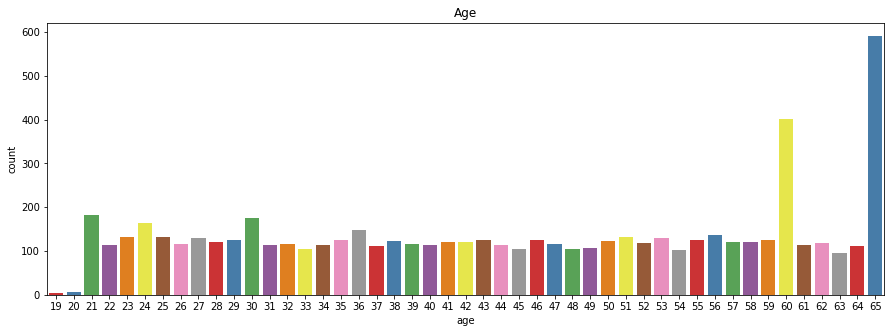

In [29]:
plt.figure(figsize = (15,5))
sns.countplot(df['age'], palette='Set1')
plt.title("Age")


plt.show()

PT.XYZ di dominasi oleh karyawan berumur 65 Tahun dengan total 591 atau 9.4 % dari keseluruhan

In [30]:
df.stb.freq(['monthHire'], cum_cols =False)

,monthHire,count,percent
0,November,590,9.388924
1,October,549,8.736474
2,June,544,8.656906
3,December,531,8.450032
4,August,523,8.322724
5,March,522,8.306811
6,May,519,8.259071
7,January,519,8.259071
8,September,518,8.243157
9,July,513,8.163590


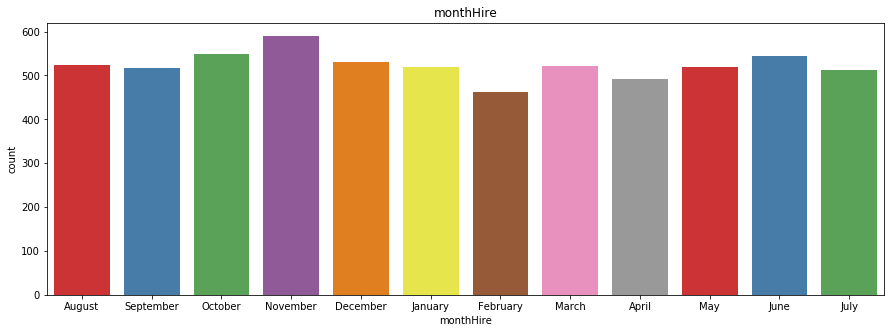

In [31]:
plt.figure(figsize = (15,5))
sns.countplot(df['monthHire'], palette='Set1')
plt.title("monthHire")


plt.show()

PT.XYZ paling banyak mengontrak Karyawannya di bulan November dengan total 590 atau 9.3 % dari total karyawan

In [32]:
df.stb.freq(['gender_full'], cum_cols =False).head(10)

,gender_full,count,percent
0,Female,3278,52.164227
1,Male,3006,47.835773


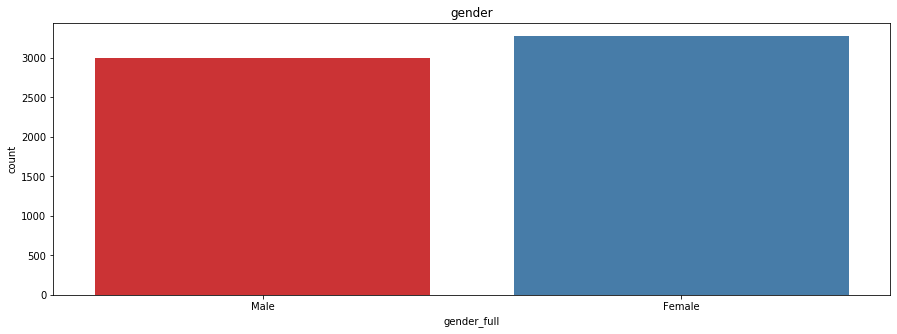

In [33]:
plt.figure(figsize = (15,5))
sns.countplot(df['gender_full'], palette='Set1')
plt.title("gender")


plt.show()

PT.XYZ didominasi karyawan Perempuan dengan total 3278 atau 52.1% dari total karyawan

In [34]:
df.stb.freq(['BUSINESS_UNIT'], cum_cols =False).head(10)

,BUSINESS_UNIT,count,percent
0,STORES,6204,98.726926
1,HEADOFFICE,80,1.273074


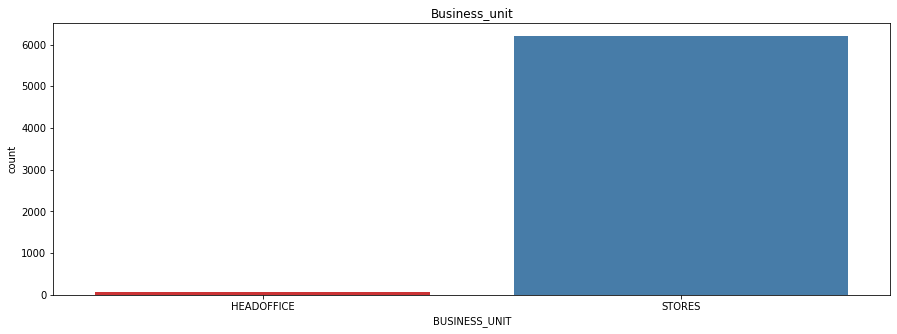

In [35]:
plt.figure(figsize = (15,5))
sns.countplot(df['BUSINESS_UNIT'], palette='Set1')
plt.title("Business_unit")


plt.show()

Para Karyawan PT.XYZ paling banyak ada diunit Stores dengan total 6204 atau 98,7% dari total karyawan

In [36]:
top_job =df.stb.freq(['job_title'], cum_cols =False).head(10)
top_job

,job_title,count,percent
0,Meat Cutter,1218,19.382559
1,Cashier,1158,18.427753
2,Dairy Person,1032,16.422661
3,Produce Clerk,1027,16.343094
4,Baker,865,13.765118
5,Shelf Stocker,704,11.203055
6,Store Manager,35,0.556970
7,Meats Manager,34,0.541057
8,Produce Manager,33,0.525143
9,Bakery Manager,33,0.525143


Job_title paling banyak  di PT.XYZ adalah Meat Cutter dengan total 1218 atau 19% dari total karyawan

In [37]:
df.stb.freq(['department_name'], cum_cols =False)

,department_name,count,percent
0,Meats,1252,19.923616
1,Customer Service,1190,18.936983
2,Produce,1060,16.868237
3,Dairy,1033,16.438574
4,Bakery,898,14.290261
5,Processed Foods,736,11.712285
6,Store Management,35,0.556970
7,Executive,10,0.159134
8,Recruitment,9,0.143221
9,HR Technology,9,0.143221


Department paling banyak pegawainya di PT.XYZ adalah Meats dengan total 1252 atau 19% dari total karyawan

In [38]:
df.stb.freq(['city_name'], cum_cols =False).head(10)

,city_name,count,percent
0,Vancouver,1392,22.151496
1,Victoria,624,9.929981
2,Nanaimo,481,7.654360
3,New Westminster,403,6.413113
4,Kelowna,305,4.853596
5,Kamloops,267,4.248886
6,Prince George,264,4.201146
7,Burnaby,258,4.105665
8,Cranbrook,219,3.485041
9,Surrey,197,3.134946


Kota yang paling banyak memiliki pegawai adalah kota Vancouver dengan total 1392 atau 22% dari total karyawan

In [39]:
df.stb.freq(['store_name'], cum_cols =False).head(10)

,store_name,count,percent
0,46,522,8.306811
1,18,481,7.654360
2,21,403,6.413113
3,42,392,6.238065
4,43,311,4.949077
5,16,305,4.853596
6,44,284,4.519414
7,15,267,4.248886
8,26,264,4.201146
9,5,258,4.105665


Cabang yang paling banyak memiliki karyawan adalah cabang ke 46 dengan jumlah karyawan 522 atau 8.3% dari total karyawan

In [40]:
df.stb.freq(['termreason_desc'], cum_cols =False).head(10)

,termreason_desc,count,percent
0,Not Applicable,4799,76.368555
1,Retirement,885,14.083386
2,Resignaton,385,6.126671
3,Layoff,215,3.421388


Hingga tahun 2015, total karyawan yang masih aktif sekitar 4799 atau 76.36% , lalu karyawan yang pensiun ada 885 atau 14%, lalu karyawan yang mengundurkan diri ada 385 atau 6%, lalu karyawan yang mengalami layoff ada 215 atau 3.42 %

#### Multivariate

In [41]:
a= (pd.crosstab(index=df['job_title'], columns=df['STATUS']))
top_job= a.sort_values(by=['TERMINATED'],ascending= False).head(10)
top_job.reset_index(inplace=True)
top_job

STATUS,job_title,ACTIVE,TERMINATED
0,Meat Cutter,864,354
1,Produce Clerk,695,332
2,Cashier,910,248
3,Dairy Person,842,190
4,Baker,774,91
5,Shelf Stocker,630,74
6,Store Manager,4,31
7,Meats Manager,11,23
8,Bakery Manager,12,21
9,Produce Manager,12,21


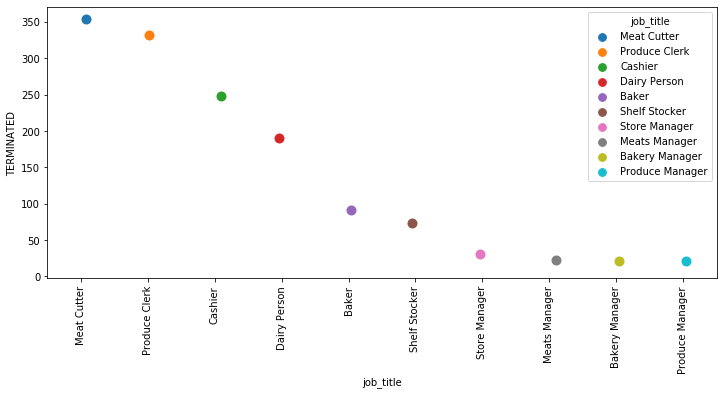

In [42]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
sns.stripplot(x = 'job_title', y = 'TERMINATED', data = top_job,hue='job_title',size=10)
plt.show()

Karyawan yang paling banyak berhenti dari pekerjaan adalah yang karyawan yang bekerja sebagai Meat Cutter 

In [43]:
b= (pd.crosstab(index=df['city_name'], columns=df['STATUS']))
top_city = b.sort_values(by=['TERMINATED'],ascending= False).head(10)
top_city.reset_index(inplace=True)
top_city

STATUS,city_name,ACTIVE,TERMINATED
0,Vancouver,1096,296
1,Victoria,473,151
2,Nanaimo,399,82
3,New Westminster,333,70
4,Kamloops,206,61
5,Kelowna,246,59
6,Prince George,209,55
7,Fort Nelson,0,47
8,New Westminister,0,44
9,Surrey,153,44


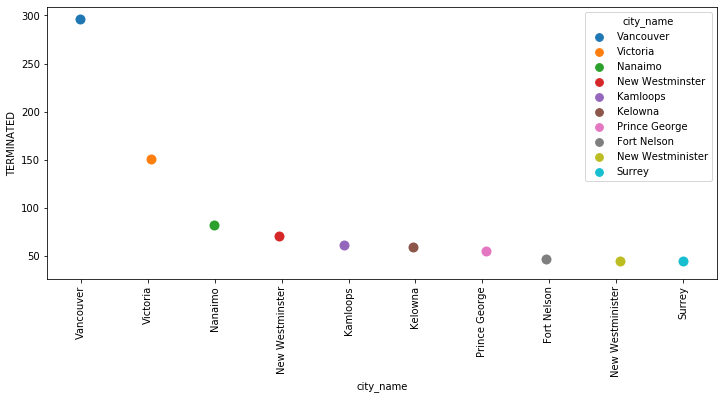

In [44]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
sns.stripplot(x = 'city_name', y = 'TERMINATED', data = top_city,hue='city_name',size=10)
plt.show()

Karyawan yang paling banyak berhenti dari pekerjaan ada di kota Vancouver

In [45]:
c= (pd.crosstab(index=df['store_name'], columns=df['STATUS']))
top_store = c.sort_values(by=['TERMINATED'],ascending= False).head(10)
top_store.reset_index(inplace=True)
top_store

STATUS,store_name,ACTIVE,TERMINATED
0,35,14,207
1,37,0,102
2,18,399,82
3,21,333,70
4,15,206,61
5,16,246,59
6,26,209,55
7,46,473,49
8,11,0,47
9,20,0,44


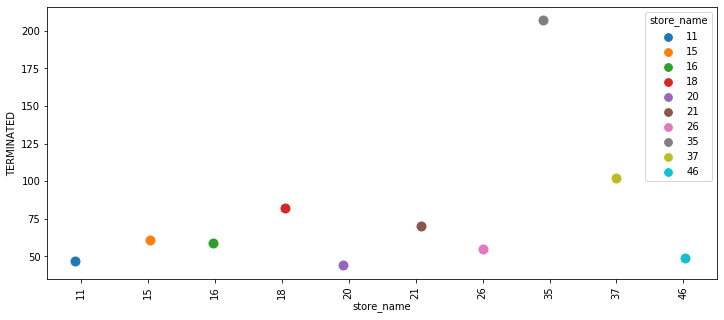

In [46]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
sns.stripplot(x = 'store_name', y = 'TERMINATED', data = top_store,hue='store_name',size=10)
plt.show()

Store yang paling banyak karyawan yang berhenti dari pekerjaan adalah cabang 35

In [47]:
d= (pd.crosstab(index=df['gender_full'], columns=df['STATUS'], normalize=True)*100)
d.reset_index(inplace=True)
d

STATUS,gender_full,ACTIVE,TERMINATED
0,Female,37.603437,14.560789
1,Male,38.765118,9.070656


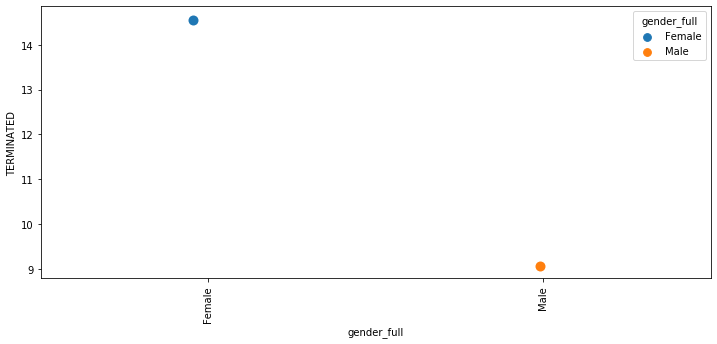

In [48]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
sns.stripplot(x = 'gender_full', y = 'TERMINATED', data = d,hue='gender_full',size=10)
plt.show()

berdasarkan jenis kelamin, karyawan yang paling banyak berhenti dari pekerjaan adalah karyawan perempuan

In [49]:
e= (pd.crosstab(index=df['length_of_service'], columns=df['STATUS'], normalize=True)*100)
top_masa = e.sort_values(by=['TERMINATED'],ascending= False).head(10)
top_masa.reset_index(inplace=True)
top_masa

STATUS,length_of_service,ACTIVE,TERMINATED
0,13,3.421388,7.718014
1,8,2.816677,3.469128
2,1,0.000000,2.164227
3,24,2.975812,1.257161
4,19,3.246340,1.209421
5,5,3.262253,0.986633
6,25,0.747931,0.954806
7,6,3.246340,0.779758
8,20,3.771483,0.572884
9,2,2.673456,0.509230


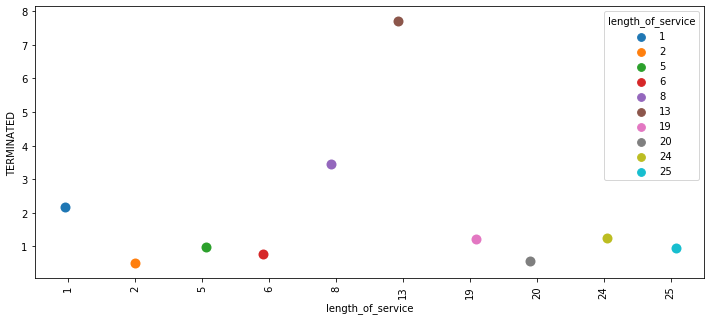

In [50]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
sns.stripplot(x = 'length_of_service', y = 'TERMINATED', data = top_masa,hue='length_of_service',size=10)
plt.show()

berdasarkan Masa kerja, Karyawan yang telah bekerja selama 13 tahun paling banyak berhenti dari pekerjaan

In [51]:
f= (pd.crosstab(index=df['monthTerm'], columns=df['STATUS'], normalize=True)*100)
f.reset_index(inplace=True)
f

STATUS,monthTerm,ACTIVE,TERMINATED
0,April,0.000000,1.400382
1,August,0.000000,1.193507
2,December,0.000000,5.490134
3,February,0.000000,1.861871
4,January,76.368555,1.400382
5,July,0.000000,1.654997
6,June,0.000000,1.814131
7,March,0.000000,1.591343
8,May,0.000000,1.782304
9,November,0.000000,1.686824


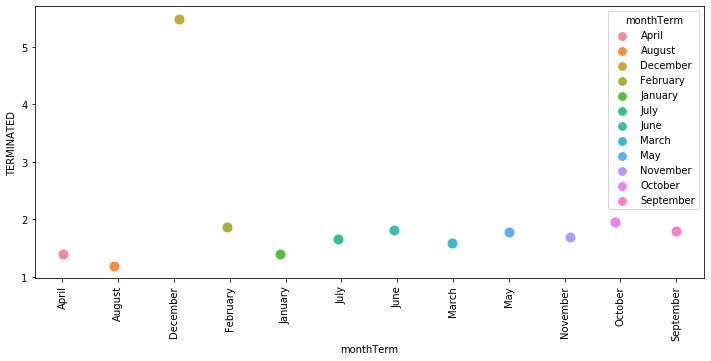

In [52]:
plt.figure(figsize=(12,5))
plt.xticks(rotation=90)
sns.stripplot(x = 'monthTerm', y = 'TERMINATED', data = f,hue='monthTerm',size=10)
plt.show()

bulan yang paling sering terjadi adanya karyawan yang berhenti dari pekerjaan adalah bulan Desember

In [53]:
df.columns

Index(['EmployeeID', 'recorddate_key', 'birthdate_key', 'age',
       'length_of_service', 'city_name', 'department_name', 'job_title',
       'store_name', 'gender_short', 'gender_full', 'termreason_desc',
       'termtype_desc', 'STATUS_YEAR', 'STATUS', 'BUSINESS_UNIT', 'dayTerm',
       'monthIntTerm', 'monthTerm', 'yearTerm', 'dayHire', 'monthIntHire',
       'monthHire', 'yearHire'],
      dtype='object')

In [54]:
df.head()

,EmployeeID,recorddate_key,birthdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,...,STATUS,BUSINESS_UNIT,dayTerm,monthIntTerm,monthTerm,yearTerm,dayHire,monthIntHire,monthHire,yearHire
9,1318,12/31/2015 0:00,1/3/1954,61,26,Vancouver,Executive,CEO,35,M,...,ACTIVE,HEADOFFICE,1,1,January,1900,28,8,August,1989
19,1319,12/31/2015 0:00,1/3/1957,58,26,Vancouver,Executive,VP Stores,35,F,...,ACTIVE,HEADOFFICE,1,1,January,1900,28,8,August,1989
29,1320,12/31/2015 0:00,1/2/1955,60,26,Vancouver,Executive,Legal Counsel,35,F,...,ACTIVE,HEADOFFICE,1,1,January,1900,28,8,August,1989
39,1321,12/31/2015 0:00,1/2/1959,56,26,Vancouver,Executive,VP Human Resources,35,M,...,ACTIVE,HEADOFFICE,1,1,January,1900,28,8,August,1989
49,1322,12/31/2015 0:00,1/9/1958,57,26,Vancouver,Executive,VP Finance,35,M,...,ACTIVE,HEADOFFICE,1,1,January,1900,31,8,August,1989


## 7.Feature Engineering & Feature Selection

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6284 entries, 9 to 49652
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   EmployeeID         6284 non-null   int64 
 1   recorddate_key     6284 non-null   object
 2   birthdate_key      6284 non-null   object
 3   age                6284 non-null   int64 
 4   length_of_service  6284 non-null   int64 
 5   city_name          6284 non-null   object
 6   department_name    6284 non-null   object
 7   job_title          6284 non-null   object
 8   store_name         6284 non-null   int64 
 9   gender_short       6284 non-null   object
 10  gender_full        6284 non-null   object
 11  termreason_desc    6284 non-null   object
 12  termtype_desc      6284 non-null   object
 13  STATUS_YEAR        6284 non-null   int64 
 14  STATUS             6284 non-null   object
 15  BUSINESS_UNIT      6284 non-null   object
 16  dayTerm            6284 non-null   int64 

dari total kolom diatas, kolom yang akan digunakan sebagai parameter prediksi terhadap karyawan yang akan keluar adalah Kolom Age, Length_of_service, city_name,department_name, gender_full,Business_unit, status, store_name. namun Karena beberapa kolom masi ada yang berupa object, maka akan dilakukan binning dan recategorize.

#### a. Binning pada kolom Umur

Karena rentang umur yang sangat jauh, maka akan dilakukan bining. pengelompokan umur yaitu:
1. Generasi Tradisionalis (1922 – 1945)
2. Generasi Baby Boomers (1946 – 1964)
3. Generasi X  (1965-1980)
4. Generasi Milenial (1981-1994)
5. Generasi Z (1995-2010)

berdasar Sumber ini https://news.okezone.com/read/2019/02/24/65/2022109/6-generasi-manusia-anda-masuk-kelompok-mana

In [56]:
bin_age = [5,20,34,50,df['age'].max()]
label = ['gen_z','gen_mil','gen_x','gen_bom']

df['gen'] = pd.cut(df['age'], bins= bin_age, labels =label)
df.head()

,EmployeeID,recorddate_key,birthdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,...,BUSINESS_UNIT,dayTerm,monthIntTerm,monthTerm,yearTerm,dayHire,monthIntHire,monthHire,yearHire,gen
9,1318,12/31/2015 0:00,1/3/1954,61,26,Vancouver,Executive,CEO,35,M,...,HEADOFFICE,1,1,January,1900,28,8,August,1989,gen_bom
19,1319,12/31/2015 0:00,1/3/1957,58,26,Vancouver,Executive,VP Stores,35,F,...,HEADOFFICE,1,1,January,1900,28,8,August,1989,gen_bom
29,1320,12/31/2015 0:00,1/2/1955,60,26,Vancouver,Executive,Legal Counsel,35,F,...,HEADOFFICE,1,1,January,1900,28,8,August,1989,gen_bom
39,1321,12/31/2015 0:00,1/2/1959,56,26,Vancouver,Executive,VP Human Resources,35,M,...,HEADOFFICE,1,1,January,1900,28,8,August,1989,gen_bom
49,1322,12/31/2015 0:00,1/9/1958,57,26,Vancouver,Executive,VP Finance,35,M,...,HEADOFFICE,1,1,January,1900,31,8,August,1989,gen_bom


setelah melakukan binning pada umur, proses selanjutnya akan dilakukan encoding terhadap tiap generasi

In [57]:
df['gen_encoding']=  df['gen'].map({'gen_z':0,'gen_mil':1,'gen_x':2,'gen_bom':3})


#### b. Binning pada kolom Gender_full

In [58]:
df = pd.get_dummies(df, columns = ['gender_full'])
df

,EmployeeID,recorddate_key,birthdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,...,monthTerm,yearTerm,dayHire,monthIntHire,monthHire,yearHire,gen,gen_encoding,gender_full_Female,gender_full_Male
9,1318,12/31/2015 0:00,1/3/1954,61,26,Vancouver,Executive,CEO,35,M,...,January,1900,28,8,August,1989,gen_bom,3,0,1
19,1319,12/31/2015 0:00,1/3/1957,58,26,Vancouver,Executive,VP Stores,35,F,...,January,1900,28,8,August,1989,gen_bom,3,1,0
29,1320,12/31/2015 0:00,1/2/1955,60,26,Vancouver,Executive,Legal Counsel,35,F,...,January,1900,28,8,August,1989,gen_bom,3,1,0
39,1321,12/31/2015 0:00,1/2/1959,56,26,Vancouver,Executive,VP Human Resources,35,M,...,January,1900,28,8,August,1989,gen_bom,3,0,1
49,1322,12/31/2015 0:00,1/9/1958,57,26,Vancouver,Executive,VP Finance,35,M,...,January,1900,31,8,August,1989,gen_bom,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49648,8258,12/1/2015 0:00,5/28/1994,21,2,Valemount,Dairy,Dairy Person,34,M,...,December,2015,19,8,August,2013,gen_mil,1,0,1
49649,8264,8/1/2013 0:00,6/13/1994,19,0,Vancouver,Customer Service,Cashier,44,F,...,August,2013,27,8,August,2013,gen_z,0,1,0
49650,8279,12/1/2015 0:00,7/18/1994,21,2,White Rock,Customer Service,Cashier,39,F,...,December,2015,15,9,September,2013,gen_mil,1,1,0
49651,8296,12/1/2013 0:00,9/2/1994,19,0,Kelowna,Customer Service,Cashier,16,F,...,December,2013,9,10,October,2013,gen_z,0,1,0


#### c. Binning pada kolom department

In [91]:
df = pd.get_dummies(df, columns = ['department_name'])
df

,EmployeeID,recorddate_key,birthdate_key,age,length_of_service,job_title,store_name,gender_short,termreason_desc,termtype_desc,...,department_name_Information Technology,department_name_Investment,department_name_Labor Relations,department_name_Legal,department_name_Meats,department_name_Processed Foods,department_name_Produce,department_name_Recruitment,department_name_Store Management,department_name_Training
9,1318,12/31/2015 0:00,1/3/1954,61,26,CEO,35,M,Not Applicable,Not Applicable,...,0,0,0,0,0,0,0,0,0,0
19,1319,12/31/2015 0:00,1/3/1957,58,26,VP Stores,35,F,Not Applicable,Not Applicable,...,0,0,0,0,0,0,0,0,0,0
29,1320,12/31/2015 0:00,1/2/1955,60,26,Legal Counsel,35,F,Not Applicable,Not Applicable,...,0,0,0,0,0,0,0,0,0,0
39,1321,12/31/2015 0:00,1/2/1959,56,26,VP Human Resources,35,M,Not Applicable,Not Applicable,...,0,0,0,0,0,0,0,0,0,0
49,1322,12/31/2015 0:00,1/9/1958,57,26,VP Finance,35,M,Not Applicable,Not Applicable,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49648,8258,12/1/2015 0:00,5/28/1994,21,2,Dairy Person,34,M,Layoff,Involuntary,...,0,0,0,0,0,0,0,0,0,0
49649,8264,8/1/2013 0:00,6/13/1994,19,0,Cashier,44,F,Resignaton,Voluntary,...,0,0,0,0,0,0,0,0,0,0
49650,8279,12/1/2015 0:00,7/18/1994,21,2,Cashier,39,F,Layoff,Involuntary,...,0,0,0,0,0,0,0,0,0,0
49651,8296,12/1/2013 0:00,9/2/1994,19,0,Cashier,16,F,Resignaton,Voluntary,...,0,0,0,0,0,0,0,0,0,0


#### d. Binning pada kolom Business_unit

In [59]:
df['bu_encoding'] = df['BUSINESS_UNIT'].map({"STORES" : 0, 'HEADOFFICE' : 1})


#### e. Binning pada kolom Status

In [62]:
df['status_encoding'] = df['STATUS'].map({"ACTIVE" : 0, 'TERMINATED' : 1})


penjelasan mengenai hasil binning, karyawan yang masih aktif statusnya menjadi 0, karyawan yang telah berhenti dari pekerjaan statusnya menjadi 1

#### f. Binning pada kolom City_name

In [211]:
df = pd.get_dummies(df, columns = ['city_name'])
df

,EmployeeID,recorddate_key,birthdate_key,age,length_of_service,job_title,store_name,gender_short,termreason_desc,termtype_desc,...,department_name_Information Technology,department_name_Investment,department_name_Labor Relations,department_name_Legal,department_name_Meats,department_name_Processed Foods,department_name_Produce,department_name_Recruitment,department_name_Store Management,department_name_Training
9,1318,12/31/2015 0:00,1/3/1954,61,26,CEO,35,M,Not Applicable,Not Applicable,...,0,0,0,0,0,0,0,0,0,0
19,1319,12/31/2015 0:00,1/3/1957,58,26,VP Stores,35,F,Not Applicable,Not Applicable,...,0,0,0,0,0,0,0,0,0,0
29,1320,12/31/2015 0:00,1/2/1955,60,26,Legal Counsel,35,F,Not Applicable,Not Applicable,...,0,0,0,0,0,0,0,0,0,0
39,1321,12/31/2015 0:00,1/2/1959,56,26,VP Human Resources,35,M,Not Applicable,Not Applicable,...,0,0,0,0,0,0,0,0,0,0
49,1322,12/31/2015 0:00,1/9/1958,57,26,VP Finance,35,M,Not Applicable,Not Applicable,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49648,8258,12/1/2015 0:00,5/28/1994,21,2,Dairy Person,34,M,Layoff,Involuntary,...,0,0,0,0,0,0,0,0,0,0
49649,8264,8/1/2013 0:00,6/13/1994,19,0,Cashier,44,F,Resignaton,Voluntary,...,0,0,0,0,0,0,0,0,0,0
49650,8279,12/1/2015 0:00,7/18/1994,21,2,Cashier,39,F,Layoff,Involuntary,...,0,0,0,0,0,0,0,0,0,0
49651,8296,12/1/2013 0:00,9/2/1994,19,0,Cashier,16,F,Resignaton,Voluntary,...,0,0,0,0,0,0,0,0,0,0


In [209]:
df.columns

Index(['EmployeeID', 'recorddate_key', 'birthdate_key', 'age',
       'length_of_service', 'job_title', 'store_name', 'gender_short',
       'termreason_desc', 'termtype_desc', 'STATUS_YEAR', 'STATUS',
       'BUSINESS_UNIT', 'dayTerm', 'monthIntTerm', 'monthTerm', 'yearTerm',
       'dayHire', 'monthIntHire', 'monthHire', 'yearHire', 'gen',
       'gen_encoding', 'gender_full_Female', 'gender_full_Male', 'bu_encoding',
       'status_encoding', 'city_name_Abbotsford', 'city_name_Aldergrove',
       'city_name_Bella Bella', 'city_name_Blue River', 'city_name_Burnaby',
       'city_name_Chilliwack', 'city_name_Cortes Island',
       'city_name_Cranbrook', 'city_name_Dawson Creek', 'city_name_Dease Lake',
       'city_name_Fort Nelson', 'city_name_Fort St John',
       'city_name_Grand Forks', 'city_name_Haney', 'city_name_Kamloops',
       'city_name_Kelowna', 'city_name_Langley', 'city_name_Nanaimo',
       'city_name_Nelson', 'city_name_New Westminister',
       'city_name_New Westmin

#### g. Feature selection

In [212]:
df_ml = df.drop(columns=['EmployeeID','recorddate_key','birthdate_key','gender_short','STATUS_YEAR','termtype_desc','termreason_desc','STATUS','BUSINESS_UNIT','dayTerm','monthIntTerm','monthTerm',
                        'yearTerm','dayHire','monthIntHire','monthHire','yearHire','gen'])
# melakukan drop pada kolom yang tidak digunakan dalam membuat machine learning

In [94]:
df_ml.head()

,age,length_of_service,job_title,store_name,gen_encoding,gender_full_Female,gender_full_Male,bu_encoding,status_encoding,city_name_Abbotsford,...,department_name_Information Technology,department_name_Investment,department_name_Labor Relations,department_name_Legal,department_name_Meats,department_name_Processed Foods,department_name_Produce,department_name_Recruitment,department_name_Store Management,department_name_Training
9,61,26,CEO,35,3,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
19,58,26,VP Stores,35,3,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
29,60,26,Legal Counsel,35,3,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
39,56,26,VP Human Resources,35,3,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
49,57,26,VP Finance,35,3,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [217]:
df_ml.corr()

,age,length_of_service,store_name,gender_full_Female,gender_full_Male,bu_encoding,status_encoding,city_name_Abbotsford,city_name_Aldergrove,city_name_Bella Bella,...,department_name_Information Technology,department_name_Investment,department_name_Labor Relations,department_name_Legal,department_name_Meats,department_name_Processed Foods,department_name_Produce,department_name_Recruitment,department_name_Store Management,department_name_Training
age,1.000000,0.849308,-0.007411,0.092785,-0.092785,0.136544,0.264318,-0.013634,-0.001034,-0.019040,...,0.030462,0.029476,0.037018,0.026170,0.450344,-0.231231,0.280695,0.047731,0.091228,0.034456
length_of_service,0.849308,1.000000,0.020619,0.050012,-0.050012,0.159273,-0.121367,-0.019508,-0.001717,-0.018559,...,0.025778,0.030536,0.035877,0.025363,0.405352,-0.184432,0.167245,0.057671,0.108613,0.034143
store_name,-0.007411,0.020619,1.000000,-0.005286,0.005286,0.066953,-0.061885,-0.234741,-0.191462,-0.096376,...,0.016638,0.014880,0.018227,0.012886,0.035373,0.007593,-0.026200,0.022329,-0.019217,0.016638
gender_full_Female,0.092785,0.050012,-0.005286,1.000000,-1.000000,0.000763,0.105256,-0.007904,-0.009152,0.009600,...,-0.029468,-0.013724,-0.011654,-0.008239,0.067716,-0.026678,0.000050,0.019419,-0.001102,-0.006872
gender_full_Male,-0.092785,-0.050012,0.005286,-1.000000,1.000000,-0.000763,-0.105256,0.007904,0.009152,-0.009600,...,0.029468,0.013724,0.011654,0.008239,-0.067716,0.026678,-0.000050,-0.019419,0.001102,0.006872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
department_name_Processed Foods,-0.231231,-0.184432,0.007593,-0.026678,0.026678,-0.041360,-0.097767,-0.014749,-0.022563,-0.019521,...,-0.010278,-0.009192,-0.011260,-0.007960,-0.181678,1.000000,-0.164067,-0.013794,-0.027258,-0.010278
department_name_Produce,0.280695,0.167245,-0.026200,0.000050,-0.000050,-0.051152,0.102540,0.013658,0.025351,-0.008240,...,-0.012711,-0.011368,-0.013926,-0.009845,-0.224690,-0.164067,1.000000,-0.017059,-0.033712,-0.012711
department_name_Recruitment,0.047731,0.057671,0.022329,0.019419,-0.019419,0.333507,0.058176,-0.004565,-0.003872,-0.002030,...,-0.001069,-0.000956,-0.001171,-0.000828,-0.018891,-0.013794,-0.017059,1.000000,-0.002834,-0.001069
department_name_Store Management,0.091228,0.108613,-0.019217,-0.001102,0.001102,-0.008498,0.114403,0.008975,0.013483,0.035999,...,-0.002112,-0.001889,-0.002314,-0.001636,-0.037330,-0.027258,-0.033712,-0.002834,1.000000,-0.002112


In [215]:
correlation = df_ml.corr()
correlation['status_encoding'].sort_values(ascending = False)[1:]

age                                0.264318
bu_encoding                        0.167382
city_name_Fort Nelson              0.156053
city_name_New Westminister         0.150955
city_name_Grand Forks              0.130615
                                     ...   
store_name                        -0.061885
department_name_Processed Foods   -0.097767
gender_full_Male                  -0.105256
department_name_Bakery            -0.107260
length_of_service                 -0.121367
Name: status_encoding, Length: 67, dtype: float64

In [216]:
# Karena hasil dari bining tadi cukup banyak, sehingga untuk pengecekan korelasinya tidak dilakukan visualisasi

In [213]:
X= df_ml.drop(columns=['status_encoding','job_title','age']) #age tidak digunakan karena telah diubah menjadi generasi
#jobtitle tidak digunakan karena data masi berupa objek
y= df_ml['status_encoding']

In [80]:
from sklearn.model_selection import train_test_split

## 8. Splitting Data

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .20, random_state =42 ) # fungsi random state adalah untuk mengunci hasil randomnya agar tidak berubah

## 9.Machine Learning Modeling

In [129]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, accuracy_score

In [115]:
df['STATUS'].value_counts()/df['STATUS'].count()*100

ACTIVE        76.368555
TERMINATED    23.631445
Name: STATUS, dtype: float64

In [128]:
df['status_encoding'].value_counts()/df['status_encoding'].count()*100

0    76.368555
1    23.631445
Name: status_encoding, dtype: float64

Karena syarat data balance adalah perbandingan antar categorinya maximal 80:20, maka target yang akan ditebak sudah balance sehingga yang akan diliat dari Confusion Metrics adalah Accuracynya

#### a.Logistic Regression

In [218]:
modelLog = LogisticRegression()
modelLog.fit(X_train, y_train)
logreg_train = modelLog.predict(X_train)
logreg_test = modelLog.predict(X_test)
print("Hasil Classification Logistic Regression Train")
acclog_train = accuracy_score(y_train,logreg_train)
acclog_test = accuracy_score(y_test,logreg_test)
print(classification_report(y_train, logreg_train))
print(100*'=')
print("Hasil Classification Logistic Regression Test")
print(classification_report(y_test, logreg_test))
print(100*'=')
print('Model LogReg Accuracy Score Train:', acclog_train)
print('Model LogReg Accuracy Score Test:', acclog_test)

Hasil Classification Logistic Regression Train
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3843
           1       0.98      0.68      0.81      1184

    accuracy                           0.92      5027
   macro avg       0.95      0.84      0.88      5027
weighted avg       0.93      0.92      0.92      5027

Hasil Classification Logistic Regression Test
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       956
           1       0.99      0.66      0.79       301

    accuracy                           0.92      1257
   macro avg       0.95      0.83      0.87      1257
weighted avg       0.92      0.92      0.91      1257

Model LogReg Accuracy Score Train: 0.9226178635369008
Model LogReg Accuracy Score Test: 0.9164677804295943


#### b.KNeighborsClassifier

In [219]:
modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train, y_train)

KNN_train = modelKNN.predict(X_train)
KNN_test = modelKNN.predict(X_test)

accKNN_train = accuracy_score(y_train,KNN_train)
accKNN_test = accuracy_score(y_test,KNN_test)
print("Hasil Classification KNN Train")
print(classification_report(y_train, KNN_train))
print(100*'=')
print("Hasil Classification KNN Test")
print(classification_report(y_test, KNN_test))
print(100*'=')
print('Model KNN Score :',accKNN_train)
print('Model KNN Score :',accKNN_test)

Hasil Classification KNN Train
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3843
           1       0.98      0.77      0.86      1184

    accuracy                           0.94      5027
   macro avg       0.95      0.88      0.91      5027
weighted avg       0.94      0.94      0.94      5027

Hasil Classification KNN Test
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       956
           1       0.95      0.72      0.82       301

    accuracy                           0.92      1257
   macro avg       0.93      0.86      0.89      1257
weighted avg       0.93      0.92      0.92      1257

Model KNN Score : 0.9417147404018301
Model KNN Score : 0.92442322991249


#### c. Random Forest

In [220]:
modelRF = RandomForestClassifier()
modelRF.fit(X_train, y_train)

RF_train = modelRF.predict(X_train)
RF_test = modelRF.predict(X_test)

accRF_train = accuracy_score(y_train,RF_train)
accRF_test = accuracy_score(y_test,RF_test)
print("Hasil Classification RF Train")
print(classification_report(y_train, RF_train))
print(100*'=')
print("Hasil Classification RF Test")
print(classification_report(y_test, RF_test))
print(100*'=')
print('Model RF Score :',accRF_train)
print('Model RF Score :',accRF_test)

Hasil Classification RF Train
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3843
           1       0.99      0.96      0.98      1184

    accuracy                           0.99      5027
   macro avg       0.99      0.98      0.99      5027
weighted avg       0.99      0.99      0.99      5027

Hasil Classification RF Test
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       956
           1       0.97      0.87      0.91       301

    accuracy                           0.96      1257
   macro avg       0.96      0.93      0.94      1257
weighted avg       0.96      0.96      0.96      1257

Model RF Score : 0.9896558583648299
Model RF Score : 0.9610182975338106


In [166]:
#pengecekan overfit/underfit
data = {
    "LogReg Train" : acclog_train,
    "LogReg Test" : acclog_test,
    "KNN Train" : accKNN_train,
    "KNN Test" : accKNN_test,
    "RF Train" : accRF_train,
    "RF Test" : accRF_test
}
pd.DataFrame(data=data, index = ['Accuracy'])

,LogReg Train,LogReg Test,KNN Train,KNN Test,RF Train,RF Test
Accuracy,0.922618,0.916468,0.941715,0.924423,0.989656,0.958632


In [167]:
cmLog = confusion_matrix(y_test, logreg_test, labels=[1,0])
dfLog = pd.DataFrame(data=cmLog, columns=['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

cmKNN = confusion_matrix(y_test, KNN_test, labels=[1,0])
dfKNN = pd.DataFrame(data=cmKNN, columns=['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

cmRF = confusion_matrix(y_test, RF_test, labels=[1, 0])
dfRF = pd.DataFrame(data=cmRF, columns=['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])


Text(0.5, 1, 'Random Forest Classifier')

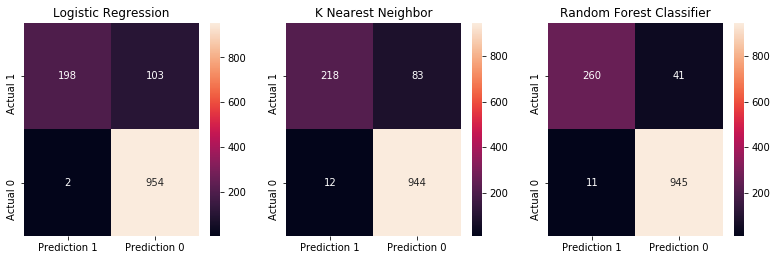

In [168]:
plt.figure(figsize=(18, 18))

plt.subplot(4,4,1)
sns.heatmap(dfLog, annot=True,fmt='d')
plt.title('Logistic Regression')

plt.subplot(4,4,2)
sns.heatmap(dfKNN, annot=True,fmt='d')
plt.title('K Nearest Neighbor')

plt.subplot(4,4,3)
sns.heatmap(dfRF, annot=True,fmt='d')
plt.title('Random Forest Classifier')

## 10. Hyperparameter Tuning

In [189]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

#### a. Logistic Regresion Hypertuning

In [140]:

modelLogTuning = LogisticRegression()
Param_Log = {
    "penalty" : ["l1","l2","elasticnet","none"],
    "class_weight" : [dict, "balanced"],
    "max_iter" : [100,300,500,1000],
    "intercept_scaling" : [1,5,10,25,100,500]
}

In [141]:
log_tuning = RandomizedSearchCV(estimator=modelLogTuning, param_distributions=Param_Log, cv = 10, n_jobs=-1, verbose=1)


In [142]:
log_tuning.fit(X_train, y_train)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done  93 out of 100 | elapsed:   14.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.5s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'class_weight': [<class 'dict'>,
                                                         'balanced'],
                                        'intercept_scaling': [1, 5, 10, 25, 100,
                                                          

In [221]:
log_tuning.best_params_

{'penalty': 'none',
 'max_iter': 1000,
 'intercept_scaling': 10,
 'class_weight': dict}

In [226]:

logreg_tuning = log_tuning.best_estimator_
logreg_tuntrain = logreg_tuning.predict(X_train)
logreg_tuntest = logreg_tuning.predict(X_test)

logregtuntrain = accuracy_score(y_train,logreg_tuntrain)
logregtuntest = accuracy_score(y_test,logreg_tuntest)
print("Hasil Classification logreg Train tuned")
print(classification_report(y_train, logreg_tuntrain))
print(100*'=')
print("Hasil Classification logreg Test tuned")
print(classification_report(y_test, logreg_tuntest))
print(100*'=')
print('Tuned accuracy LogReg Train : ', logregtuntrain)
print('Tuned accuracy LogReg Test : ', logregtuntest)

Hasil Classification logreg Train tuned
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      3843
           1       0.98      0.74      0.84      1184

    accuracy                           0.94      5027
   macro avg       0.95      0.87      0.90      5027
weighted avg       0.94      0.94      0.93      5027

Hasil Classification logreg Test tuned
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       956
           1       0.98      0.74      0.84       301

    accuracy                           0.93      1257
   macro avg       0.95      0.87      0.90      1257
weighted avg       0.94      0.93      0.93      1257

Tuned accuracy LogReg Train :  0.9355480405808634
Tuned accuracy LogReg Test :  0.9347653142402546


#### b. KNeighborsClassifier Hyperparameter tuning

In [145]:
modelKNNTuning = KNeighborsClassifier()
Param_KNN = {
    "n_neighbors" : [1,25,100,125],
    "weights" : ["distance","uniform"],
    "algorithm" : ["auto","ball_tree", "kd_tree", "brute"],
    "leaf_size" : [1,5,25,50]
}

In [146]:
KNN_tuning = RandomizedSearchCV(estimator=modelKNNTuning, param_distributions=Param_KNN, cv = 10, n_jobs=-1, verbose=1)


In [147]:
KNN_tuning.fit(X_train, y_train)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.4s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [1, 5, 25, 50],
                                        'n_neighbors': [1, 25, 100, 125],
                                        'weights': ['distance', 'uniform']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_tr

In [222]:
KNN_tuning.best_params_

{'weights': 'distance', 'n_neighbors': 1, 'leaf_size': 1, 'algorithm': 'auto'}

In [227]:
KNN_tuned = KNN_tuning.best_estimator_
KNN_tuntrain = KNN_tuned.predict(X_train)
KNN_tuntest = KNN_tuned.predict(X_test)

KNNtuntrain = accuracy_score(y_train,KNN_tuntrain)
KNNtuntest = accuracy_score(y_test,KNN_tuntest)
print("Hasil Classification KNN Train tuned")
print(classification_report(y_train, KNN_tuntrain))
print(100*'=')
print("Hasil Classification KNN Test tuned")
print(classification_report(y_test, KNN_tuntest))
print(100*'=')
print('Tuned accuracy KNN Train : ', KNNtuntrain)
print('Tuned accuracy KNN Test : ', KNNtuntest)

Hasil Classification KNN Train tuned
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3843
           1       0.97      0.97      0.97      1184

    accuracy                           0.99      5027
   macro avg       0.98      0.98      0.98      5027
weighted avg       0.99      0.99      0.99      5027

Hasil Classification KNN Test tuned
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       956
           1       0.94      0.85      0.89       301

    accuracy                           0.95      1257
   macro avg       0.95      0.92      0.93      1257
weighted avg       0.95      0.95      0.95      1257

Tuned accuracy KNN Train :  0.985677342351303
Tuned accuracy KNN Test :  0.9506762132060461


#### c. Random Forest Hyperparameter Tuning

In [198]:
modelRF_tuned = RandomForestClassifier()
param_RF = {
        "n_estimators" : [100, 300, 500],
        "max_depth" : [None, 5, 7, 9],
        "min_samples_split" : [5, 15, 25],
        "min_samples_leaf" : [2, 7, 10],
        "max_features" : ["auto", .3, .5],
        "min_impurity_decrease" : [0, 0.5, 0.7]
           }

In [199]:
RF_tuning = RandomizedSearchCV(estimator=modelRF_tuned, param_distributions=param_RF, cv = 10, n_jobs=-1, verbose=1)


In [200]:
RF_tuning.fit(X_train, y_train)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   48.3s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [201]:
RF_tuning.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [204]:
RF_tuning.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 7,
 'min_impurity_decrease': 0,
 'max_features': 'auto',
 'max_depth': None}

In [228]:

Rafo_tuned = RF_tuning.best_estimator_
Rafo_tuntrain = Rafo_tuned.predict(X_train)
Rafo_tuntest = Rafo_tuned.predict(X_test)

Rafotuntrain = accuracy_score(y_train,Rafo_tuntrain)
Rafotuntest = accuracy_score(y_test,Rafo_tuntest)
print("Hasil Classification RF Train tuned")
print(classification_report(y_train, Rafo_tuntrain))
print(100*'=')
print("Hasil Classification RF Test tuned")
print(classification_report(y_test, Rafo_tuntest))
print(100*'=')
print('Tuned accuracy RF Train : ', Rafotuntrain)
print('Tuned accuracy RF Test : ', Rafotuntest)

Hasil Classification RF Train tuned
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      3843
           1       0.98      0.74      0.84      1184

    accuracy                           0.94      5027
   macro avg       0.95      0.87      0.90      5027
weighted avg       0.94      0.94      0.93      5027

Hasil Classification RF Test tuned
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       956
           1       1.00      0.71      0.83       301

    accuracy                           0.93      1257
   macro avg       0.96      0.85      0.89      1257
weighted avg       0.94      0.93      0.93      1257

Tuned accuracy RF Train :  0.935349114780187
Tuned accuracy RF Test :  0.9299920445505171


In [206]:
cmLog_tuned = confusion_matrix(y_test, logreg_tuntest, labels=[1,0])
dfLog_tuned = pd.DataFrame(data=cmLog_tuned, columns=['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

cmKNN_tuned = confusion_matrix(y_test, KNN_tuntest, labels=[1,0])
dfKNN_tuned = pd.DataFrame(data=cmKNN_tuned, columns=['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

cmRF_tuned = confusion_matrix(y_test, Rafo_tuntest, labels=[1, 0])
dfRF_tuned = pd.DataFrame(data=cmRF_tuned, columns=['Prediction 1', 'Prediction 0'], index = ['Actual 1', 'Actual 0'])

In [229]:
#pengecekan overfit/underfit
data = {
    "LogReg Train" : logregtuntrain,
    "LogReg Test" : logregtuntest,
    "KNN Train" : KNNtuntrain,
    "KNN Test" : KNNtuntest,
    "RF Train" : Rafotuntrain,
    "RF Test" : Rafotuntest
}
pd.DataFrame(data=data, index = ['Accuracy'])

,LogReg Train,LogReg Test,KNN Train,KNN Test,RF Train,RF Test
Accuracy,0.935548,0.934765,0.985677,0.950676,0.935349,0.929992


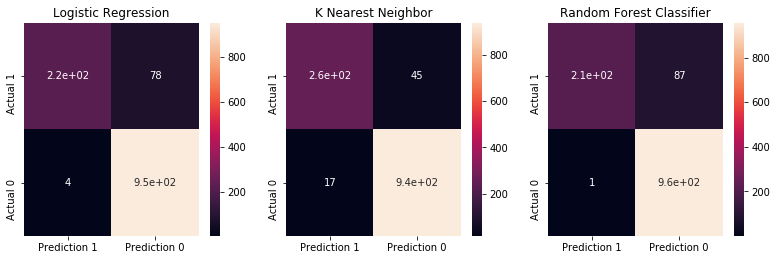

In [230]:

plt.figure(figsize=(18, 18))

plt.subplot(4,4,1)
sns.heatmap(dfLog_tuned, annot=True)
plt.title('Logistic Regression')

plt.subplot(4,4,2)
sns.heatmap(dfKNN_tuned, annot=True)
plt.title('K Nearest Neighbor')

plt.subplot(4,4,3)
sns.heatmap(dfRF_tuned, annot=True)
plt.title('Random Forest Classifier')
plt.show()

Setelah Menggunakan 3 algoritma model yaitu Logistic Regression, K Nearest Neighbor, dan Random Forest Classifier, saya memilih menggunakan model KNN karena akurasinya menebaknya 95% dan juga KNN paling sedikit memiliki FN dibanding model lainnya. 

In [232]:
import joblib

In [233]:
joblib.dump(Rafo_tuned, 'Model_KNN')

['Model_KNN']

## Summary


A. EDA
- Karyawan PT.XYZ yang paling banyak meninggalkan perusahaan karena sudah memasuki masa pensiun
- Karyawan PT.XYZ yang paling banyak meninggalkan perusahaan ada di kota Vanhouver
- Karyawan PT.XYZ yang paling banyak meninggalkan perusahaan ada di cabang 35
- Biasanya karyawan yang berjenis kelamin perempuan berpeluang lebih besar dibanding pria untuk keluar dari perusahaan
- Karyawan paling sering meninggalkan perusahaan dibulan Desember
- Kebanyakan Karyawan Keluar dari perusahaan setelah kerja selama 13 tahun

B. Machine Learning
- Setelah melakukan tuning kepada 3 algoritma yaitu KNN, Logistic Regression, Random Forest. basemodel yang paling baik untuk digunakan adalah KNN

#### Saran

- Untuk  store di kota Vanhouver dan store cabang 35 lebih baik merekrut pegawai ketika masih muda dan Utamakan berjenis kelamin Pria, serta ketika di akhir tahun berikan uang bonus agar si pegawai tidak keluar dari perusahaan dan lebih semangat dalam melakukan pekerjaan
- Jika masa bakti karyawan sudah lebih dari 5 tahun setiap tahunnya perlu diberikan bonus lebih dan jika kinerjanya sangat baik, diharapkan untuk mendapatkan promosi jabatan